# Stock Prediction 

 

In [128]:
import pandas as pd
import datetime as dt
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

ff=pd.read_csv('stockdata.csv')

#Arima

In [3]:
from pmdarima.arima import auto_arima

data = ff.sort_index(ascending=True, axis=0)

train = data[:9000]
valid = data[9000:]

training = train['close']
validation = valid['close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)


C:\Users\kaviy\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\kaviy\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\kaviy\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\kaviy\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\kaviy\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 19

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-14367.486, BIC=-14331.968, Fit time=66.396 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=-7926.639, BIC=-7912.432, Fit time=2.843 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=-10902.967, BIC=-10874.553, Fit time=22.393 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-14384.036, BIC=-14355.622, Fit time=61.114 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=-14389.368, BIC=-14353.850, Fit time=101.984 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=-10922.770, BIC=-10894.355, Fit time=35.154 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=-14380.488, BIC=-14337.867, Fit time=300.088 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=-8508.084, BIC=-8486.774, Fit time=3.425 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=-14378.854, BIC=-14329.130, Fit time=22

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(0, 1, 2),
      out_of_sample_size=0, scoring='mse', scoring_args=None,
      seasonal_order=(1, 1, 1, 12), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend=None,
      with_intercept=True)

0.7538735623610084


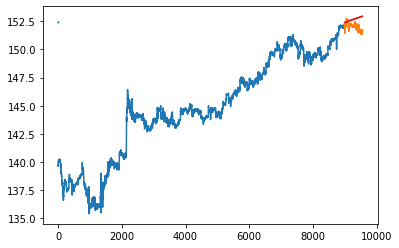

In [6]:
forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

rms=np.sqrt(np.mean(np.power((np.array(valid['close'])-np.array(forecast['Prediction'])),2)))
print(rms)

new=model.predict(n_periods=20) # prediction count
new=pd.DataFrame(new,columns=['Prediction'])

plt.plot(train['close'])
plt.plot(valid['close'])
plt.plot(new['Prediction'])
plt.plot(forecast['Prediction'])

#LinearRegression

In [130]:
# X

In [131]:
# ff.index=ff['Date']
# ff = ff[['open', 'high', 'low', 'close', 'volume']]
# ff['highLoad'] = (ff['high'] - ff['close']) / ff['close'] * 100.0
# ff['change'] = (ff['close'] - ff['open']) / ff['open'] * 100.0
# ff = ff[['close', 'highLoad', 'change', 'volume']]
    

# forecast_col = 'close'
# forecast_out = int(math.ceil(0.1*len(ff)))
# ff['Label'] = ff[[forecast_col]].shift(-forecast_out)

# X = ff.drop(['Label'], axis=1)
# X = preprocessing.scale(X)
# # X_forecast = X[-forecast_out:]
# # X = X[:-forecast_out]

# ff.dropna(inplace=True)
# y = ff['Label']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# clf = LinearRegression(n_jobs=-1)
# clf.fit(X_train, y_train)
# accuracy = clf.score(X_test, y_test)
# forecast = clf.predict(X_forecast)

# y_test['Prediction'] = np.nan

# # last_date = ff.iloc[-1].name
# # last_date = dt.datetime.strptime(str(last_date), "%Y-%m-%d ")

# for pred in forecast:
#     last_date += dt.timedelta(days=1)
#     ff.loc[last_date.strftime("%Y-%m-%d")] = [np.nan for _ in range(len(df.columns) - 1)] + [pred]
    

In [132]:
# ff['close'].plot(color='black')
# pd.DataFrame(forecast).plot(color='green')


# plt.legend(loc=4)
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.show()

# Twitter Preprocessing

In [67]:
tweets_df=pd.read_csv('tweetsdata.csv')

In [68]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 


def preprocess_text(para):
    i=tweets_df[tweets_df['tweets']==para].index.tolist()
    # LowerCase
    para=para.lower()
    
    #Remove Http Links
    para=re.sub(r'http\S+', '', para)
    
    # Remove hastag
    para=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",para).split())
        
    # Punctuations & Symbols 
    para=re.sub(r'[^\w]',' ', para)
    # Whitespaces
    para=para.replace("  ", " ")
    para=para.strip()
    
    # Stop Words
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(para) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    para = " ".join(filtered_sentence)
#     print(para)
    
    
   
    tweets_df['new_tweets'].iloc[i]=para


C:\Users\kaviy\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [69]:
import re
tweets_df['new_tweets']=' '

for x in tweets_df['tweets']:
    preprocess_text(x)

C:\Users\kaviy\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [70]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

tokenized_tweet = tweets_df['new_tweets'].apply(lambda x: x.split())
word_lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
for i, tokens in enumerate(tokenized_tweet):
    tokenized_tweet[i] = ' '.join(tokens)

tweets_df['new_tweets'] = tokenized_tweet

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kaviy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [71]:
tweets_df.head()

,Unnamed: 0,tweets,new_tweets
0,0,We have another BIG update with Windows Termin...,another big update window terminal v0 7
1,1,"Microsoft researchers have created Icebreaker,...",microsoft researcher created icebreaker deep g...
2,2,#PowerShell included by default in a Linux dis...,powershell included default linux distro
3,3,"For one year, we tracked the polymorphic threa...",one year tracked polymorphic threat dexphot re...
4,4,DEADLINE APPROACHING \n\nIf you want to:\n le...,deadline approaching want lead local community...


In [72]:
from textblob import TextBlob

class Tweet(object):

    def __init__(self, content, polarity):
        self.content = content
        self.polarity = polarity
        
tweet_list = []
global_polarity = 0
for tweet in tweets_df.new_tweets:
    tw = tweet
    blob = TextBlob(tw)
    polarity = 0
    for sentence in blob.sentences:
        polarity += sentence.sentiment.polarity
        global_polarity += sentence.sentiment.polarity
    tweet_list.append(Tweet(tw, polarity))

global_polarity = global_polarity / len(tweet_list)

# Recommendation 

In [75]:
symbol='MSFT'
if ff.iloc[-forecast_out-1]['close'] < ff.iloc[-1]['Prediction']:
    if global_polarity > 0:
        print("According to the predictions and twitter sentiment analysis -> Investing in %s is a GREAT idea!" % str(symbol))
    elif global_polarity < 0:
        print("According to the predictions and twitter sentiment analysis -> Investing in %s is a BAD idea!" % str(symbol))
else:
    print("According to the predictions and twitter sentiment analysis -> Investing in %s is a BAD idea!" % str(symbol))


According to the predictions and twitter sentiment analysis -> Investing in MSFT is a BAD idea!
